<a href="https://colab.research.google.com/github/benedi91/data_science/blob/master/neural_network_image_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here is a nice code that could be useful for preparing your images for using them in your neural network based on one-hot vectors. It also enables you to save the output data at your google disc. The code is adapted to use it with colab. I use here kaggle cats and dogs dataset as example, but it is easy to convert the code to another dataset.

In [1]:
# My input dataset is stored on my github, IMO it is a good way if you want to work with colab
! git clone https://github.com/benedi91/datasets.git

fatal: destination path 'datasets' already exists and is not an empty directory.


In [0]:
import os
import cv2
import numpy as np
from tqdm import tqdm

class DogsVSCats():
  
  IMG_SIZE = 50 #size of an output image
  CATS = "datasets/PetImages/Cat" #directory of the CATS folder
  DOGS = "datasets/PetImages/Dog" #directory of the DOGS folder
  LABELS = {CATS: 0,DOGS: 1}
  training_data = []
  catcount = 0
  dogcount = 0
  padColor = 127 #color of padding

  def make_training_data(self): #stretches the non square image
    for label in self.LABELS:
      print(label)
      for f in tqdm(os.listdir(label)):
        try:
          path = os.path.join(label, f)       
          img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) #output images would be in greyscale, if you want color type: cv2.IMREAD_COLOR(no alpha channel) or cv2.IMREAD_UNCHANGED (with alpha channel)
          img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
          self.training_data.append([np.array(img),np.eye(2)[self.LABELS[label]]]) # add one-hot vector to image
          if label == self.CATS:
            self.catcount += 1
          elif label == self.DOGS:
            self.dogcount += 1 
        except Exception as e:
          pass
          

    np.random.shuffle(self.training_data)
    np.save("training_data.npy",self.training_data)
    print("Cats:",self.catcount)
    print("Dogs:",self.dogcount)
    
  def make_training_data_pad(self): #same as previous, but does not stretch the non square image
    for label in self.LABELS:
      print(label)
      for f in tqdm(os.listdir(label)): 
        try:
          path = os.path.join(label, f)
          img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) #output images would be in greyscale, if you want color type: cv2.IMREAD_COLOR(no alpha channel) or cv2.IMREAD_UNCHANGED (with alpha channel)
          # resizing an image
          h, w = img.shape[:2]
          sh = self.IMG_SIZE
          sw = self.IMG_SIZE
          # interpolation method of resize
          if h > sh or w > sw: # shrinking image
              interp = cv2.INTER_AREA
          else: # stretching image
              interp = cv2.INTER_CUBIC
          # aspect ratio of image
          aspect = w/h
          # compute scaling and pad sizing
          if aspect > 1: # horizontal image
              new_w = sw
              new_h = np.round(new_w/aspect).astype(int)
              pad_vert = (sh-new_h)/2
              pad_top, pad_bot = np.floor(pad_vert).astype(int), np.ceil(pad_vert).astype(int)
              pad_left, pad_right = 0, 0
          elif aspect < 1: # vertical image
              new_h = sh
              new_w = np.round(new_h*aspect).astype(int)
              pad_horz = (sw-new_w)/2
              pad_left, pad_right = np.floor(pad_horz).astype(int), np.ceil(pad_horz).astype(int)
              pad_top, pad_bot = 0, 0
          else: # square image
              new_h, new_w = sh, sw
              pad_left, pad_right, pad_top, pad_bot = 0, 0, 0, 0
          # set pad color
          if len(img.shape) is 3 and not isinstance(padColor, (list, tuple, np.ndarray)): # color image but only one color provided
              padColor = [padColor]*3
          # scale and pad
          img2 = cv2.resize(img, (new_w, new_h), interpolation=interp)
          img2 = cv2.copyMakeBorder(img2, pad_top, pad_bot, pad_left, pad_right, borderType=cv2.BORDER_CONSTANT, value=self.padColor)
          #img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
          self.training_data.append([np.array(img2),np.eye(2)[self.LABELS[label]]])
          if label == self.CATS:
            self.catcount += 1
          elif label == self.DOGS:
            self.dogcount += 1 
        except Exception as e:
          pass
          

    np.random.shuffle(self.training_data)
    np.save("training_data.npy",self.training_data)
    print("Cats:",self.catcount)
    print("Dogs:",self.dogcount)

In [0]:
#create an object
dogsvcats = DogsVSCats()

In [0]:
#use method "make_training_data" on the object
dogsvcats.make_training_data()

In [0]:
#or use method "make_training_data_pad" on the object (use ony one method)
dogsvcats.make_training_data_pad()

In [0]:
training_data = np.load("training_data.npy", allow_pickle=True)

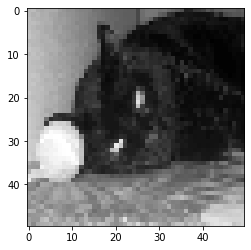

In [50]:
# check image from preprocessed dataset
import matplotlib.pyplot as plt

plt.imshow(training_data[9][0], cmap ="gray")
plt.show()

And now, you can save your preprocessed dataset to google disc, or whereever you want 

In [51]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
np.save(F"/content/gdrive/My Drive/training_data.npy",training_data)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
